In [1]:
library(dplyr) 
library(ggplot2) 
library(caTools) 
library(caret)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: lattice


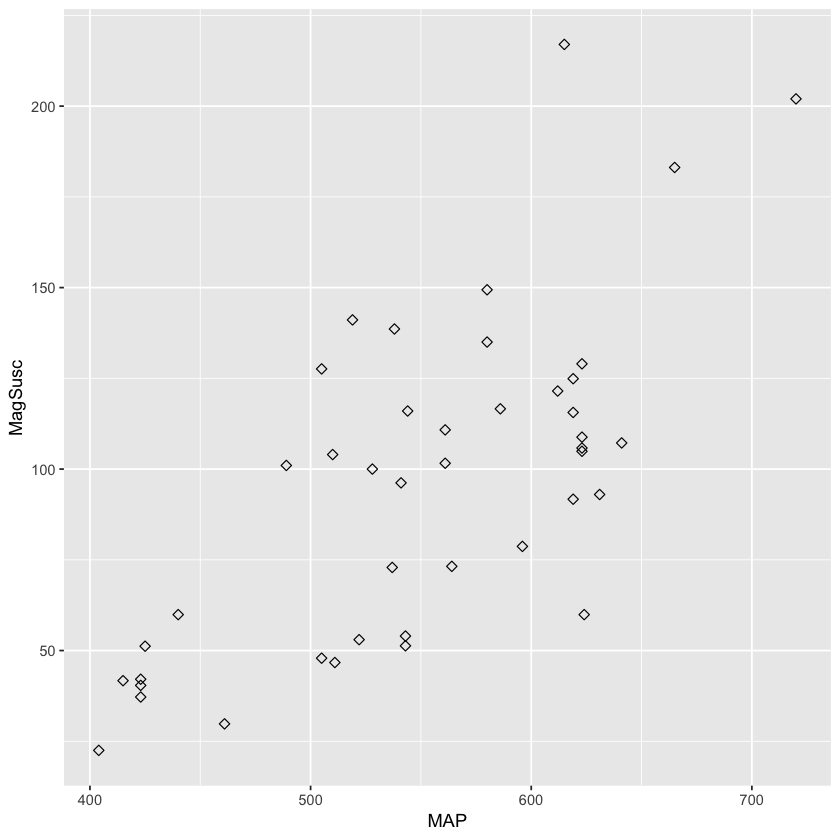

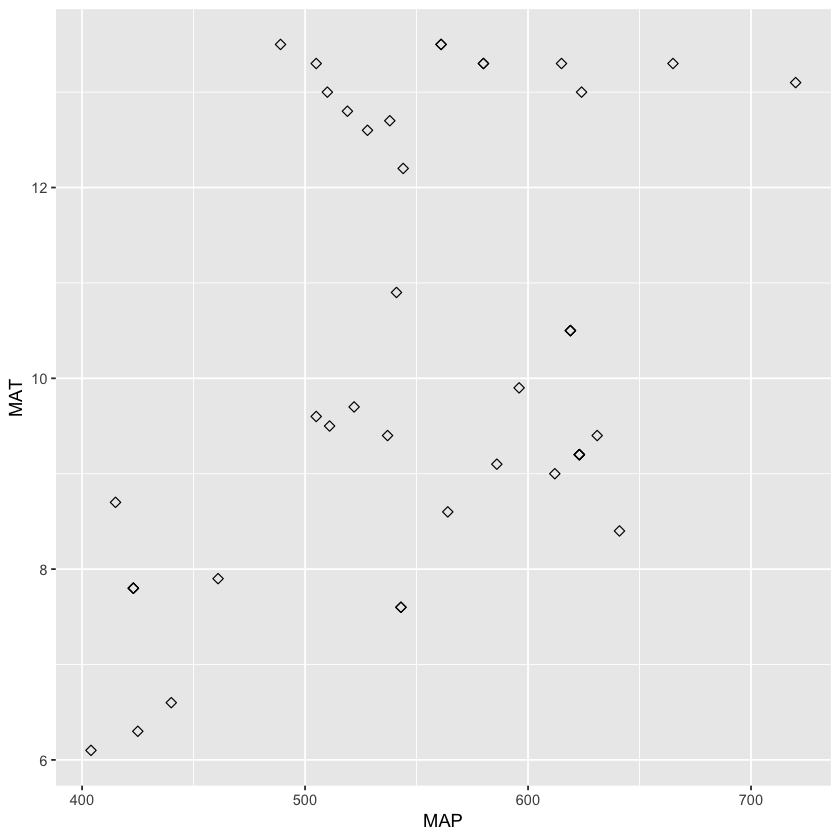

In [4]:
df <- read.csv(file = '/Users/rogerfu/Dropbox/my_classes/EPS_102_2021/Rogers_lectures/ML1/porter_MAP_magsusc.txt', stringsAsFactors = FALSE)
ggplot(df, aes(x=MAP, y=MagSusc)) +
  geom_point(size=2, shape=23) 
ggplot(df, aes(x=MAP, y=MAT)) +
  geom_point(size=2, shape=23) 

In [42]:
set.seed(123)
sampleSplit <- sample.split(Y=df$MagSusc, SplitRatio=0.7) 
trainSet <- subset(x=df, sampleSplit==TRUE)
testSet <- subset(x=df, sampleSplit==FALSE)
model <- lm(formula=MagSusc ~ MAP, data=trainSet)
summary(model)


Call:
lm(formula = MagSusc ~ MAP, data = trainSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.440 -23.346  -0.303  14.558  58.357 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -83.31780   40.27327  -2.069 0.047909 *  
MAP           0.31996    0.07365   4.345 0.000166 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.18 on 28 degrees of freedom
Multiple R-squared:  0.4027,	Adjusted R-squared:  0.3813 
F-statistic: 18.88 on 1 and 28 DF,  p-value: 0.0001658


In [7]:
olsmodel=lm(formula=MagSusc ~ MAP, data=df)
summary(olsmodel)


Call:
lm(formula = MagSusc ~ MAP, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-66.295 -27.110   0.264  18.171  94.524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -131.67435   36.13374  -3.644 0.000747 ***
MAP            0.41325    0.06512   6.346 1.39e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.49 on 41 degrees of freedom
Multiple R-squared:  0.4955,	Adjusted R-squared:  0.4832 
F-statistic: 40.27 on 1 and 41 DF,  p-value: 1.393e-07


In [26]:
x<-as.vector(df$MAP)
y<-as.vector(df$MagSusc)

In [62]:
# squared error cost function
cost <- function(X, y, theta) {
  sum( (X %*% theta - y)^2 ) / (2*length(y))
}
# learning rate and iteration limit
alpha <- 0.000003
num_iters <- 10000
# keep history
cost_history <- double(num_iters)
theta_history <- list(num_iters)
# initialize coefficients
theta <- matrix(c(0,0), nrow=2)
# add a column of 1's for the intercept coefficient
X <- cbind(1, matrix(x))

# gradient descent
for (i in 1:num_iters) {
  error <- (X %*% theta - y)
  delta <- t(X) %*% error * c(10000,1) / length(y)
  theta <- theta - alpha * delta
  cost_history[i] <- cost(X, y, theta)
  theta_history[[i]] <- theta
}
print(theta)


             [,1]
[1,] -131.1063557
[2,]    0.4122374


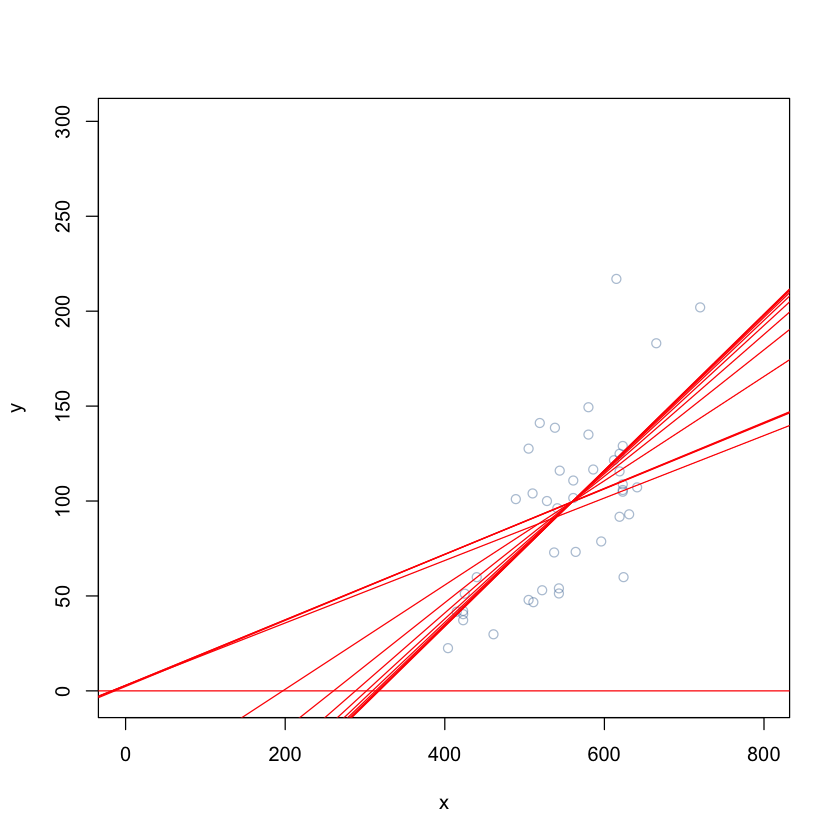

In [68]:
# plot data and converging fit
plot(x,y, col=rgb(0.2,0.4,0.6,0.4), xlim=c(-2,800), ylim=c(-2,300))
for (i in c(1,2,3,seq(10,num_iters,by=1000))) {
  abline(coef=theta_history[[i]], col='red')
}
abline(coef=c(0,0), col='red')


In [88]:
lm1 <- train(MagSusc~., data = df, method = "lm")
lm1

Linear Regression 

43 samples
 2 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 43, 43, 43, 43, 43, 43, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  28.49503  0.6708014  21.58973

Tuning parameter 'intercept' was held constant at a value of TRUE

In [89]:
tc <- trainControl(method = "cv", number = 10)
lm1 <- train(MagSusc~., data = df, method = "lm", trControl = tc)
summary(lm1)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.272 -14.925   0.536  16.012  73.535 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -162.94971   28.99471  -5.620 1.62e-06 ***
MAP            0.28935    0.05647   5.124 7.96e-06 ***
MAT            9.65911    1.87320   5.156 7.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.5 on 40 degrees of freedom
Multiple R-squared:  0.697,	Adjusted R-squared:  0.6818 
F-statistic:    46 on 2 and 40 DF,  p-value: 4.267e-11


In [81]:
olsmodel=lm(formula=MagSusc ~ MAP + MAT, data=df)
summary(olsmodel)


Call:
lm(formula = MagSusc ~ MAP + MAT, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-83.272 -14.925   0.536  16.012  73.535 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -162.94971   28.99471  -5.620 1.62e-06 ***
MAP            0.28935    0.05647   5.124 7.96e-06 ***
MAT            9.65911    1.87320   5.156 7.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.5 on 40 degrees of freedom
Multiple R-squared:  0.697,	Adjusted R-squared:  0.6818 
F-statistic:    46 on 2 and 40 DF,  p-value: 4.267e-11


In [91]:
rf1 <- train(MagSusc~., data = df, method = "rf")
rf1$results

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



mtry,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
2,31.24524,0.605242,22.57714,6.986642,0.1384505,5.095823
